## Data Cleaning

In [3]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Importing dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Number of rows and columns of dataset
df.shape

(10000, 14)

In [6]:
#Data types and null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#We find there are no null values! 

In [8]:
#Drop irrelevant columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)


## Exploratory Analysis

In [9]:
#Getting an idea of the tendencies of the data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#Checking categorical and continuous values
df.dtypes




CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
#Seperating categorical and continous values 

df_cont = df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']]
df_cat = df[['Geography','Gender','HasCrCard','IsActiveMember','Exited']]


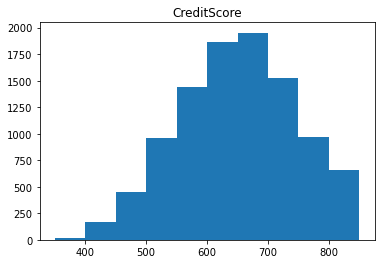

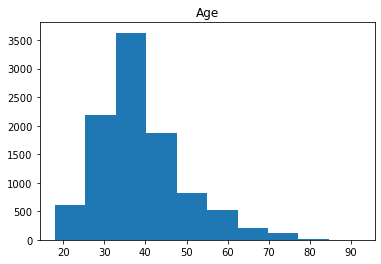

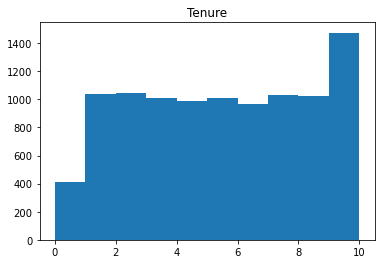

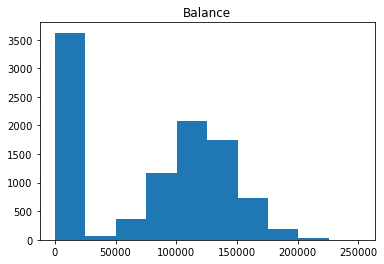

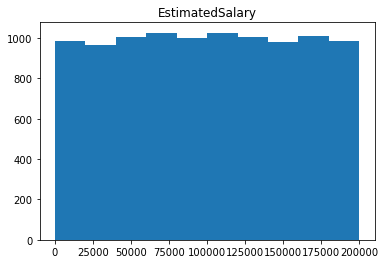

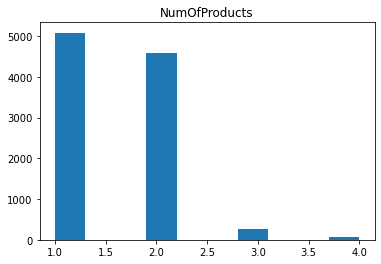

In [12]:
#distributions for all numeric variables 
for i in df_cont.columns:
    plt.hist(df_cont[i])
    plt.title(i)
    plt.show()

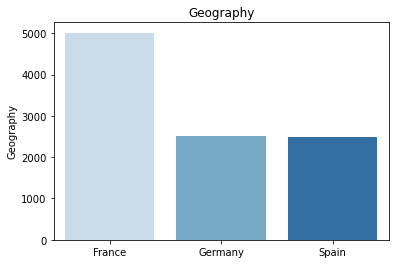

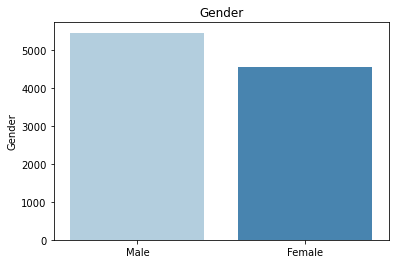

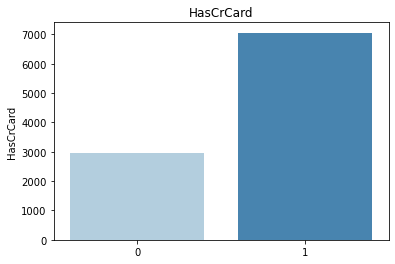

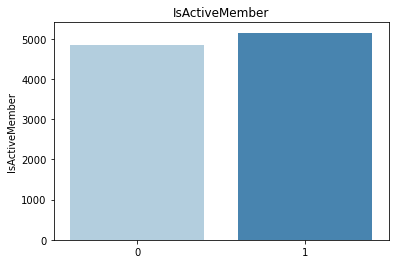

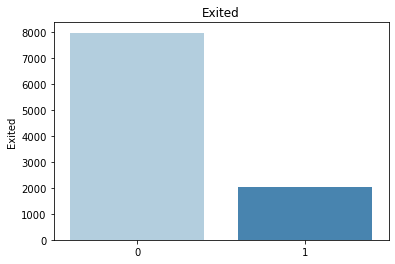

In [13]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts(), palette = "Blues").set_title(i)
    plt.show()

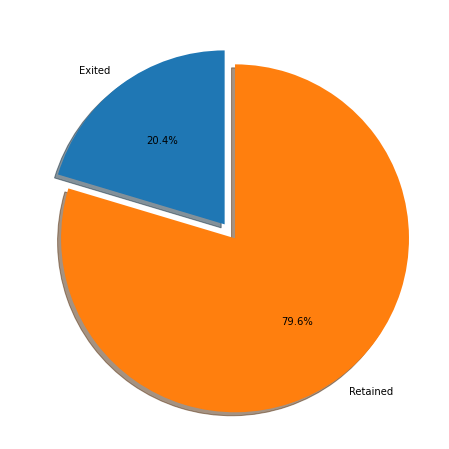

In [14]:
#Churn pie chart
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()


In [15]:
# Effects on churn
#Pivot tables for continuous variables
pd.pivot_table(df, index = 'Exited', values = ['CreditScore','Age','Tenure','Balance','EstimatedSalary', 'NumOfProducts'])


,Age,Balance,CreditScore,EstimatedSalary,NumOfProducts,Tenure
Exited,,,,,,
0,37.408389,72745.296779,651.853196,99738.391772,1.544267,5.033279
1,44.837997,91108.539337,645.351497,101465.677531,1.475209,4.932744


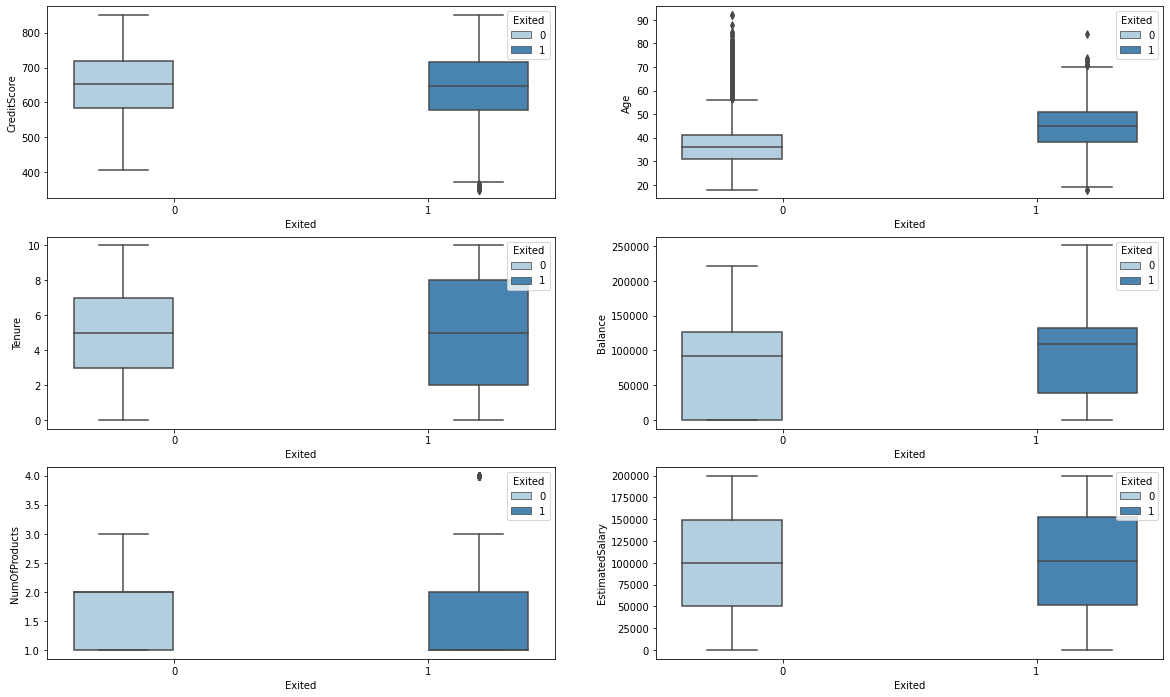

In [16]:
#Visualizing the relationship for continuous variables with boxplots    
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0], palette = "Blues")
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1], palette = "Blues")
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0], palette = "Blues")
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1], palette = "Blues")
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0], palette = "Blues")
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1], palette = "Blues")

In [17]:
#Pivot tables for categorical variables 

print(pd.pivot_table(df, index = 'Exited', columns = 'Gender', values = 'Age', aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Exited', columns = 'Geography', values = 'Age', aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Exited', columns = 'HasCrCard', values = 'Age', aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Exited', columns = 'IsActiveMember', values = 'Age', aggfunc ='count'))


Gender  Female  Male
Exited              
0         3404  4559
1         1139   898

Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413

HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424

IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735


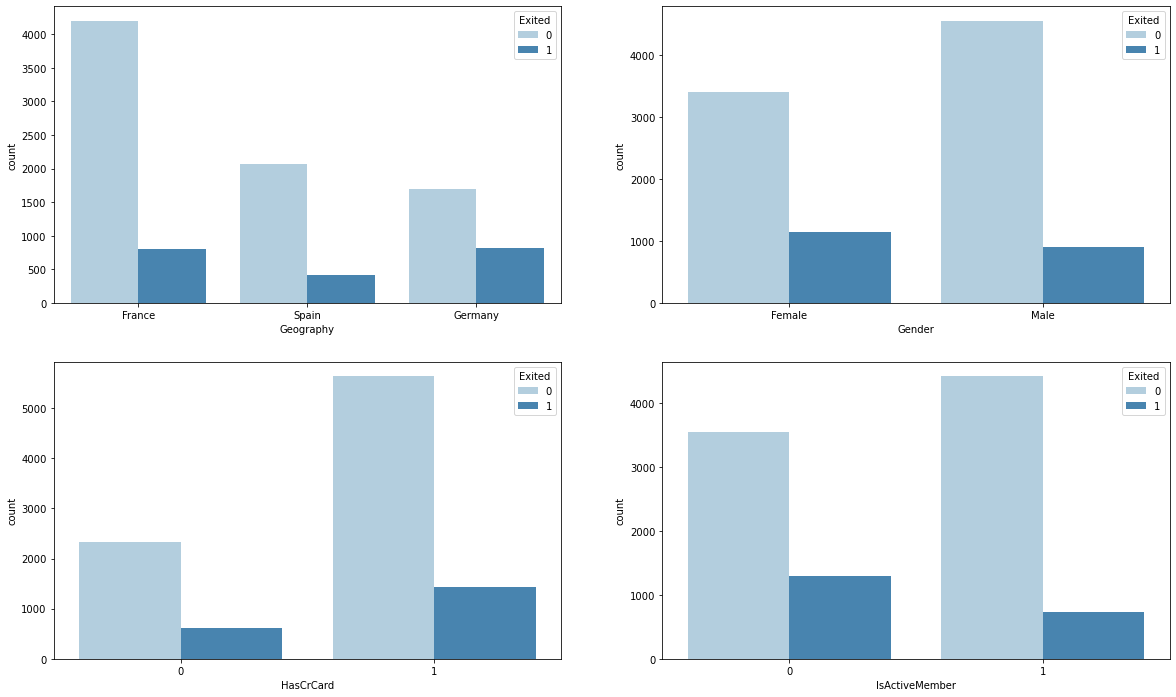

In [18]:
#Visualizing effects using barcharts
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0], palette = "Blues")
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1], palette = "Blues")
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0], palette = "Blues")
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1], palette = "Blues")





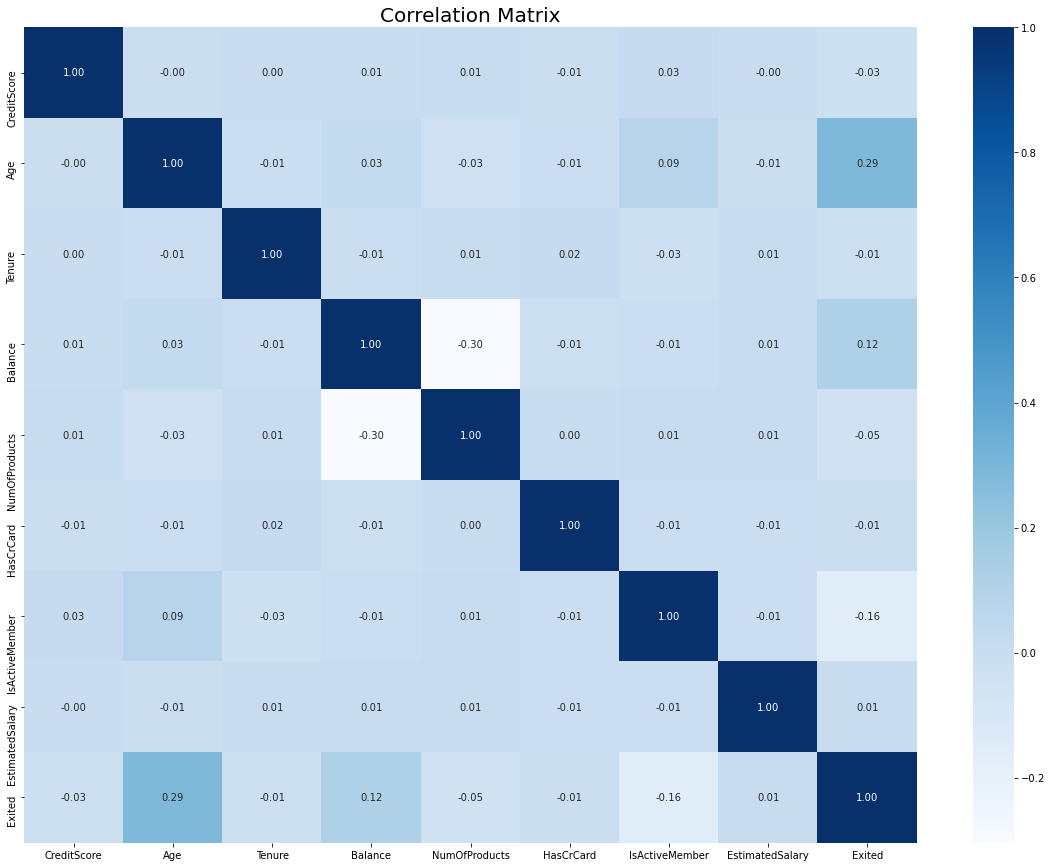

In [19]:
#Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Blues" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Feature Engineering

In [21]:
df['TenureByAge'] = df.Tenure/(df.Age)

df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary



## Data Preprocessing 


In [47]:
from sklearn.preprocessing import OneHotEncoder


In [48]:
#Split train and test
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)

In [49]:
#Setting 0 to -1
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1

In [50]:
#Seperating out columns with categorical values

s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)

In [51]:
#One Hot encodingOH_encoder.get_feature_names()



OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(df_test[object_cols]))



In [ ]:
#Adding the names of the categories as column headings
OH_cols_train.columns = OH_encoder.get_feature_names()
OH_cols_test.columns = OH_encoder.get_feature_names()

In [52]:
#Putting index back in
OH_cols_train.index = df_train.index
OH_cols_test.index = df_test.index



In [53]:
#Removing categorical columns
num_train = df_train.drop(object_cols, axis=1)
num_test = df_test.drop(object_cols, axis=1)


In [54]:
#Adding OH encoded columns to the original dataframes
df_train = pd.concat([num_train, OH_cols_train], axis=1)
df_test = pd.concat([num_test,  OH_cols_test], axis=1)


df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,TenureByAge,BalanceSalaryRatio,0,1,2,3,4
8159,461,25,6,0.00,2,1,1,15306.29,0,0.240000,0.000000,0.0,0.0,1.0,1.0,0.0
6332,619,35,4,90413.12,1,1,1,20555.21,0,0.114286,4.398550,1.0,0.0,0.0,1.0,0.0
8895,699,40,8,122038.34,1,1,-1,102085.35,0,0.200000,1.195454,1.0,0.0,0.0,1.0,0.0
5351,558,41,2,124227.14,1,1,1,111184.67,0,0.048780,1.117305,0.0,1.0,0.0,0.0,1.0
4314,638,34,5,133501.36,1,-1,1,155643.04,0,0.147059,0.857741,1.0,0.0,0.0,0.0,1.0


In [55]:
#Seperating columns with continuos values
cont_cols = list(df_cont.columns) + ['TenureByAge','BalanceSalaryRatio']

In [56]:
# Normalize data 
from sklearn.preprocessing import MinMaxScaler


# fit scaler on training data
norm = MinMaxScaler().fit(df_train[cont_cols])

# transform training data
norm_cols_train = pd.DataFrame(norm.transform(df_train[cont_cols]))

# transform testing dataabs
norm_cols_test = pd.DataFrame(norm.transform(df_test[cont_cols]))


In [57]:
norm_cols_train.index = df_train.index
norm_cols_test.index = df_test.index


In [58]:
norm_train = df_train.drop(cont_cols, axis=1)
norm_test = df_test.drop(cont_cols, axis=1)

In [59]:
df_train = pd.concat([norm_train, norm_cols_train], axis=1)
df_test = pd.concat([norm_test,  norm_cols_test], axis=1)

df_train.head()

,HasCrCard,IsActiveMember,Exited,0,1,2,3,4,0,1,2,3,4,5,6,7
8159,1,1,0,0.0,0.0,1.0,1.0,0.0,0.222,0.094595,0.6,0.000000,0.076118,0.333333,0.432000,0.000000
6332,1,1,0,1.0,0.0,0.0,1.0,0.0,0.538,0.229730,0.4,0.360358,0.102376,0.000000,0.205714,0.003317
8895,1,-1,0,1.0,0.0,0.0,1.0,0.0,0.698,0.297297,0.8,0.486406,0.510225,0.000000,0.360000,0.000901
5351,1,1,0,0.0,1.0,0.0,0.0,1.0,0.416,0.310811,0.2,0.495130,0.555744,0.000000,0.087805,0.000843
4314,-1,1,0,1.0,0.0,0.0,0.0,1.0,0.576,0.216216,0.5,0.532094,0.778145,0.000000,0.264706,0.000647


## Model Building (Baseline)


In [60]:

#Importing libraries

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [61]:
#Split into X and Y 

X_train = df_train.drop('Exited', axis=1)
Y_train = df_train.Exited

X_test = df_test.drop('Exited', axis=1)
Y_test = df_test.Exited

In [62]:
#Logistic regression 
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.794375 0.81     0.818125 0.816875 0.8025  ]
0.8083750000000001


In [63]:
#Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.7925   0.815    0.825625 0.81875  0.805625]
0.8115


In [64]:
#Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.773125 0.800625 0.8125   0.8      0.78125 ]
0.7935000000000001


In [66]:
#KNN
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.81625  0.81625  0.81875  0.814375 0.811875]
0.8154999999999999


In [67]:
#Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.854375 0.86125  0.86375  0.863125 0.851875]
0.8588749999999999


In [80]:
#SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.823125 0.831875 0.825    0.83125  0.831875]
0.8286250000000001


In [ ]:
#XGBoost
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

## Model Tuning

In [81]:
#Importing libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [82]:
#Function to return accuracy scores

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [83]:
#Logistic Regression

param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,Y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.3s


Logistic Regression
Best Score: 0.810375
Best Parameters: {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.8s finished


In [84]:
#KNN

knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,Y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.2s


KNN
Best Score: 0.820875
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   18.1s finished


In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

In [ ]:
#SVC
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,Y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min


In [ ]:
# XGBoost

XGB = XGBClassifier()

param_grid = {
                'n_estimators': [50,80,100,120], 
                'gamma': [0.01,0.001,0.001], 
                'max_depth': [5,6,7,8],
                'min_child_weight': [1,5,8,10], 
                'learning_rate': [0.05,0.1,0.2]
}

gs_XGB = GridSearchCV(estimator = XGB, param_grid = param_grid,  cv=5, n_jobs=-1)

gs_XGB.fit(X_train,Y_train)
clf_performance(gs_XGB,'XGB')